In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv('cars_multivariate.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
# horsepower is object ... not a numeric value

In [8]:
df['horsepower'] = pd.to_numeric(df.horsepower, errors='coerce')

In [10]:
# find all missing values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model           0
origin          0
car_name        0
dtype: int64

In [12]:
# impute missing values
df['horsepower'] = df.horsepower.fillna(df.horsepower.median())

In [16]:
# no missing values
df.isna().sum().sum()

0

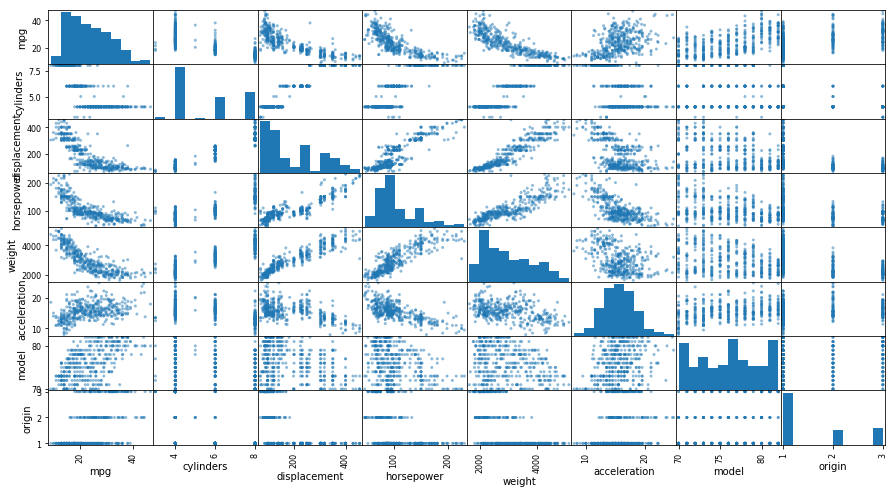

In [24]:
# looking for correlations
scatter_matrix(df, figsize=(15,8));

In [30]:
# what feature is correlated with mpg
df.corr().mpg.sort_values()

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
horsepower     -0.773453
acceleration    0.420289
origin          0.563450
model           0.579267
mpg             1.000000
Name: mpg, dtype: float64

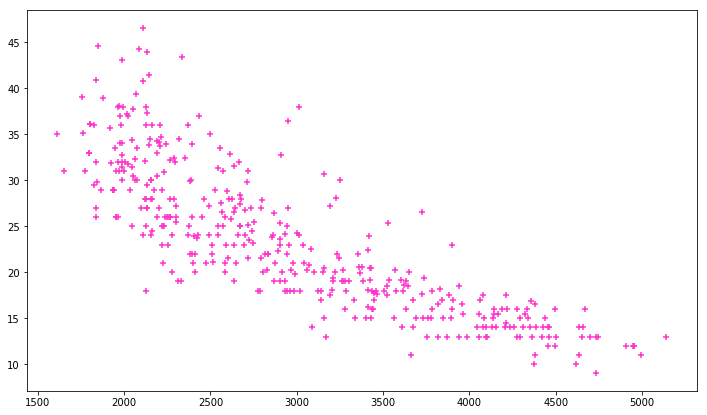

In [35]:
# weight is negatively correlated
plt.figure(figsize=(12,7))
plt.scatter(df.weight, df.mpg, color='#ff33cc', marker='+');

In [40]:
model = LinearRegression().fit(df.weight.to_frame(), df.mpg)

In [42]:
model.intercept_, model.coef_

(46.31736442026565, array([-0.00767661]))

In [47]:
xs = np.linspace(1500, 5000)
ys = (xs * model.coef_[0]) + model.intercept_

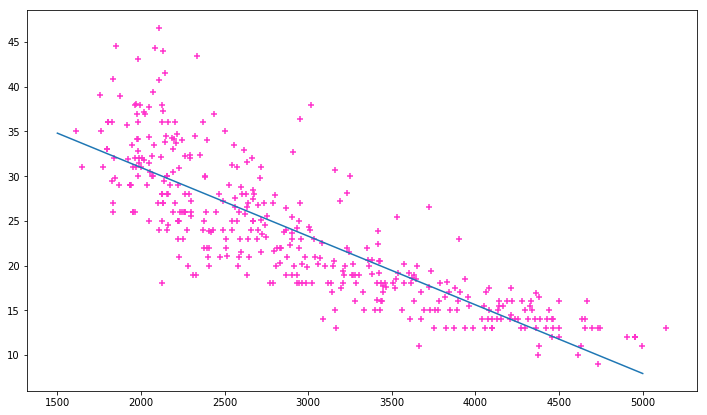

In [50]:
plt.figure(figsize=(12,7))
plt.scatter(df.weight, df.mpg, color='#ff33cc', marker='+');
plt.plot(xs, ys);

In [65]:
# what is the heaviest car
df.sort_values(by='weight', ascending=False).head(1).car_name.to_list()[0]

'pontiac safari (sw)'